	Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
a.	Import the necessary packages

b.	Load the training and testing data

c.	Define the network architecture using Keras

d.	Train the model using SGD/Adam optimizer

e.	Evaluate the network

f.	Plot the training loss and accuracy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [4]:
train = pd.read_csv('./CIFAR10/train.csv')
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_3033,pixel_3034,pixel_3035,pixel_3036,pixel_3037,pixel_3038,pixel_3039,pixel_3040,pixel_3041,pixel_3042,pixel_3043,pixel_3044,pixel_3045,pixel_3046,pixel_3047,pixel_3048,pixel_3049,pixel_3050,pixel_3051,pixel_3052,pixel_3053,pixel_3054,pixel_3055,pixel_3056,pixel_3057,pixel_3058,pixel_3059,pixel_3060,pixel_3061,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148,16,0,18,51,88,120,128,127,...,30,11,0,57,94,34,34,116,94,87,67,68,76,72,70,79,82,86,92,94,92,84,90,93,91,83,77,69,55,59,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,106,109,123,127,181,217,209,166,164,158,116,102,95,90,72,60,56,77,94,91,87,79,140,145,125,124,150,152,174,178,...,77,58,52,73,96,120,131,120,122,133,125,32,12,19,70,122,107,99,91,62,30,20,21,42,48,28,11,11,12,22,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,245,226,244,241,250,253,252,250,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,...,67,68,76,78,73,75,82,105,98,94,88,87,86,86,89,91,92,88,89,86,85,91,94,95,94,92,90,86,78,78,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,30,32,41,52,67,50,44,43,38,38,41,47,62,87,60,49,63,59,48,76,81,85,33,34,32,39,35,38,38,40,...,70,68,68,66,53,49,55,56,53,53,61,61,59,61,44,40,49,53,56,58,57,62,74,62,58,55,67,54,66,53,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,188,183,182,184,184,180,177,177,177,176,175,175,173,170,169,168,166,163,163,162,158,157,168,172,171,166,171,174,177,179,...,77,75,73,79,83,78,78,78,79,76,75,82,84,84,89,87,92,93,97,96,98,99,101,102,102,101,102,99,97,92,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,162,165,164,163,162,162,160,157,161,165,165,164,165,166,164,160,157,152,149,148,146,142,153,156,155,152,152,154,157,164,...,60,59,59,56,54,58,58,69,65,62,67,71,64,69,70,71,73,76,78,75,74,72,72,75,78,75,75,72,72,72,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,254,254,253,254,254,254,254,254,254,255,254,253,254,251,238,217,193,170,143,120,114,118,254,254,255,254,253,254,255,253,...,71,65,77,81,80,80,67,64,63,65,68,70,72,73,73,76,74,73,72,69,66,70,68,65,63,63,61,65,55,57,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,58,59,58,61,63,66,70,70,68,100,165,206,226,240,232,235,246,227,170,99,79,89,57,44,50,52,54,57,62,64,...,110,97,88,80,72,53,32,73,88,105,107,102,100,96,85,77,72,75,70,72,86,91,95,94,96,92,97,102,96,91,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,179,180,183,185,184,184,184,184,185,186,188,187,187,186,186,184,181,176,174,175,172,169,194,191,190,189,188,187,187,187,...,152,158,162,162,160,156,154,173,162,149,127,109,95,82,71,67,63,57,51,46,48,53,60,62,71,88,103,130,149,160,166,171,171,172,169,165,169,171,171,1


In [6]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values

In [10]:
x_train.shape

(50000, 3072)

In [12]:
x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32')/255

In [14]:
test = pd.read_csv('./CIFAR10/test.csv')
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_3032,pixel_3033,pixel_3034,pixel_3035,pixel_3036,pixel_3037,pixel_3038,pixel_3039,pixel_3040,pixel_3041,pixel_3042,pixel_3043,pixel_3044,pixel_3045,pixel_3046,pixel_3047,pixel_3048,pixel_3049,pixel_3050,pixel_3051,pixel_3052,pixel_3053,pixel_3054,pixel_3055,pixel_3056,pixel_3057,pixel_3058,pixel_3059,pixel_3060,pixel_3061,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,161,160,161,166,169,170,167,162,160,160,156,149,150,148,149,143,140,141,143,137,126,116,152,151,159,166,162,160,164,162,...,144,170,197,190,164,130,126,107,160,149,132,134,134,132,123,115,114,105,101,108,104,108,98,89,100,118,137,152,145,131,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,233,233,233,233,233,233,233,232,231,230,232,232,232,233,232,233,232,232,232,233,233,232,238,235,235,235,235,235,235,235,...,119,127,138,151,164,183,196,200,83,48,38,37,35,33,34,38,40,41,44,46,45,48,59,74,83,92,97,97,107,106,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,209,206,218,223,227,230,213,226,231,235,236,232,234,234,236,226,230,238,232,228,237,238,170,172,151,137,174,193,197,199,...,46,46,45,50,54,24,3,3,47,50,52,54,56,56,56,58,58,55,53,50,45,39,30,20,11,33,72,54,44,45,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,187,187,187,187,184,184,182,180,184,186,187,187,188,189,187,187,188,195,201,201,202,192,153,163,171,187,179,155,154,159,...,51,69,107,127,91,58,54,51,64,51,51,46,51,56,57,53,52,51,50,62,64,62,60,57,60,62,64,64,64,53,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,10,15,44,53,51,48,65,90,93,91,95,81,60,55,112,111,41,68,77,51,54,67,69,79,60,30,41,65,49,49,...,117,108,96,98,120,116,123,89,65,27,17,64,52,29,15,37,89,100,116,150,170,152,136,156,166,121,69,74,47,71,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,81,81,81,80,79,81,81,81,80,81,80,82,81,81,82,82,83,86,87,81,83,86,70,74,81,77,77,76,79,76,...,170,206,221,229,231,233,239,244,72,69,68,69,67,67,87,158,201,210,222,240,243,241,245,246,242,246,248,244,237,236,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,92,90,96,111,133,137,126,102,86,26,11,12,14,13,12,13,9,37,86,82,85,94,86,99,106,111,113,123,94,83,...,186,224,183,148,152,167,152,142,199,184,182,166,163,168,178,177,157,149,145,137,147,137,141,132,127,124,145,167,138,158,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,8,8,7,6,9,11,11,12,11,11,12,11,12,10,9,11,12,12,12,10,12,13,21,20,18,18,18,18,17,17,...,82,51,54,55,53,52,56,47,12,13,14,14,13,28,95,129,136,158,129,73,81,102,124,137,147,146,135,120,111,122,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,90,32,16,9,22,61,47,43,44,31,33,29,28,43,52,52,106,153,89,61,92,75,12,20,24,49,104,160,177,191,...,82,78,77,78,81,87,84,79,78,76,81,89,89,88,86,84,87,87,93,91,94,96,94,94,91,86,87,92,97,90,87,84,83,84,79,78,78,80,81,80


In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32, 32, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'] )
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,050 (3.14 MB)

 Trainable params: 822,986 (3.14 MB)

 Non-trainable params: 64 (256.00 B)

In [18]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs=11, batch_size=64)

Epoch 1/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.0985 - loss: 3.1315 - val_accuracy: 0.0977 - val_loss: 2.3035
Epoch 2/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.0981 - loss: 2.3033 - val_accuracy: 0.0977 - val_loss: 2.3031
Epoch 3/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.0987 - loss: 2.3031 - val_accuracy: 0.1053 - val_loss: 2.2949
Epoch 4/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.1532 - loss: 2.1993 - val_accuracy: 0.2520 - val_loss: 1.9668
Epoch 5/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.2678 - loss: 1.9419 - val_accuracy: 0.3947 - val_loss: 1.6401
Epoch 6/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.3980 - loss: 1.6411 - val_accuracy: 0.3712 - val_loss: 1.7967
Epoch 7/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.4664 - loss: 1.4858 - val_accuracy: 0.5429 - val_loss: 1.2888
Epoch 8/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5110 - loss: 1.3810 - 

In [19]:
x_test = test.values
x_test = x_test.reshape((10000, 32, 32, 3)).astype('float32')/255

In [20]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [21]:
predictions

array([[6.7917250e-02, 1.2091067e-01, 1.4418057e-01, ..., 3.5651036e-02,
        2.1215664e-01, 1.4207895e-01],
       [8.9537710e-02, 8.4364675e-03, 3.7337970e-05, ..., 1.5154779e-06,
        8.7573665e-01, 2.6238596e-02],
       [2.9694122e-01, 1.0363135e-02, 2.4054786e-02, ..., 6.4119208e-03,
        5.7632905e-01, 6.7221865e-02],
       ...,
       [3.5671785e-03, 2.9838789e-05, 2.0206489e-01, ..., 3.7365016e-02,
        2.2865752e-04, 6.3244766e-04],
       [8.6421266e-02, 3.2210162e-01, 3.5216775e-02, ..., 3.9592199e-02,
        6.0038440e-02, 2.0065665e-01],
       [1.7562466e-03, 2.2643014e-04, 3.0628163e-02, ..., 5.9437567e-01,
        7.6832215e-04, 4.0439999e-04]], dtype=float32)

In [22]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

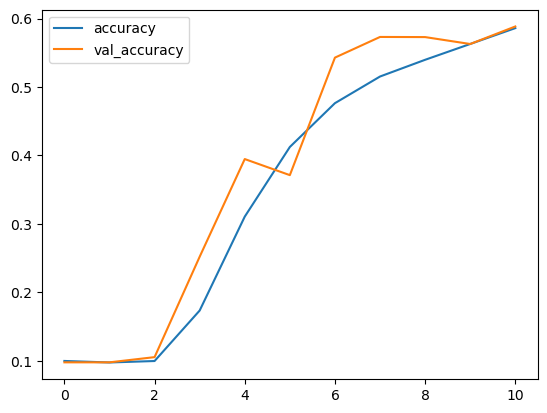

In [23]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

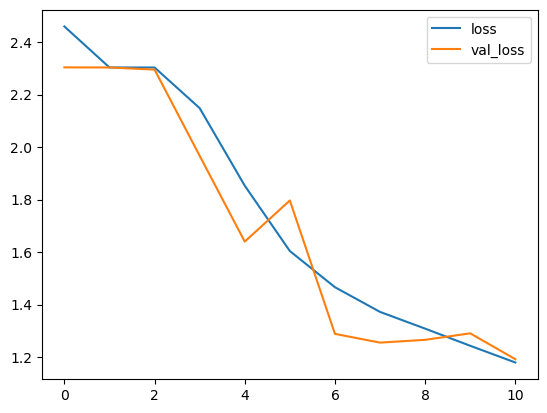

In [24]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

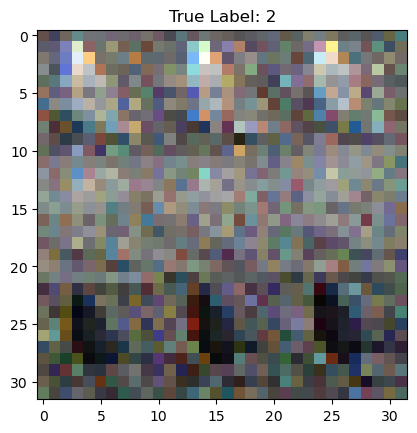

In [58]:
# 1. Show image at a specific position from the dataset
image_index = 924  # Change this to any index to view different images
plt.imshow(x_train[image_index])  # Show the image at the given index
plt.title(f"True Label: {y_train[image_index]}")
plt.show()

In [60]:

# 2. Predicting the class of the image at the given position
# For the image at `image_index`, we predict its class
image_to_predict = np.expand_dims(x_train[image_index], axis=0)  # Adding batch dimension
predicted_class = np.argmax(model.predict(image_to_predict))  # Get predicted class label
print(f"Predicted class: {predicted_class} (True label: {y_train[image_index]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: 2 (True label: 2)
